<a href="https://colab.research.google.com/github/divaamahajan/DataMining/blob/main/categorical_classification_kitsune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the Libraries and Data**


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import openpyxl


#**Global Functions and Values**

In [2]:
def get_model_metrics(model_name, y_true, y_pred):
    metrics = {}
    metrics['Model'] = model_name
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1'] = f1_score(y_true, y_pred, average='weighted')
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    
    return metrics

In [3]:
#list to metrics of all tables
metrics_table = list()

# **Load Dataset**

## Load dataset from Github Repository

In [29]:
df1 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/ARP_MitM_sampled.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Active_Wiretap_sampled.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Fuzzing_sampled.csv')
df4 = pd.read_csv("https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Mirai_sampled.csv")
df5 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/OS_Scan_sampled.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SSDP_Flood_sampled.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SSL_Renegotiation_sampled.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SYN_DoS_sampled.csv')
df9 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Video_Injection_sampled.csv')

## Displaying the contents of the file


**Primary object types:**
- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column


**Get dataframe**: 
Read CSV file from the 'data' subdirectory using a relative path.
*  `head() `will print the first 5 rows of the dataframe
*  `tail()` will print the last 5 rows) of the dataframe




In [30]:
# displaying the contents of the XLSX file
df1 = df1.drop(['Unnamed: 0',	'index'], axis=1)
df1.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,...,179786.099514,0.0,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0
1,1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,...,181996.614142,0.0,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0


In [31]:
df2 = df2.drop(['Unnamed: 0',	'index'], axis=1)
df2.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,163.049513,1306.129759,133895.850037,283.632401,1305.573004,133300.917659,871.595910,1300.438768,137735.237195,...,57217.762833,1.914975e-09,1.143837e-07,27911.418879,1227.676709,237.573391,1229.142248,56441.116252,0.221214,0.001032
1,1,174.527618,1295.076626,145592.073006,295.358524,1297.920763,141931.132312,883.612806,1297.616196,140815.653256,...,183926.684931,0.000000e+00,0.000000e+00,26755.578455,1334.536548,427.019985,1335.884650,182346.067560,0.000000,0.000000


In [32]:
df3 = df3.drop(['Unnamed: 0',	'index'], axis=1)
df3.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,183.422791,1336.527256,190462.742960,291.849930,1336.289854,189878.320827,850.126451,1336.942110,187900.563560,...,179608.126627,0.0,0.0,28076.951594,1340.929813,425.522919,1340.929813,181069.754307,0.0,0.0
1,1,237.879413,1356.333015,175809.072163,346.842926,1347.008011,183339.520567,903.558706,1340.022021,187013.751527,...,183211.967235,0.0,0.0,28082.917849,1340.514610,426.459844,1340.514610,181867.998735,0.0,0.0


In [33]:
df4 = df4.drop(['0'], axis=1)
df4 = df4.drop(['Unnamed: 0',	'index'], axis=1)
df4.head(2)
# list(df4)


,x,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,1,112.097168,60.035565,0.739410,153.541719,60.066094,1.315846,361.114006,60.101399,1.764327,...,5.002221e-12,0.0,0.0,20727.018620,60.0,0.000010,60.0,9.276846e-11,0.0,0.0
1,1,117.742473,60.138909,1.829893,162.204865,60.210187,2.786475,376.574119,60.236818,3.256390,...,4.092726e-12,0.0,0.0,22446.495481,60.0,0.000006,60.0,4.001777e-11,0.0,0.0


In [34]:
df5 = df5.drop(['Unnamed: 0',	'index'], axis=1)
df5.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,774.199578,60.0,5.002221e-12,1172.275787,60.0,8.640200e-12,3044.228765,60.0,2.273737e-12,...,0.0,0.0,0.0,1.0,60.0,0.0,60.000000,0.0,0.0,0.0
1,1,732.896796,60.0,8.185452e-12,1160.217723,60.0,1.364242e-12,3296.988952,60.0,3.592504e-11,...,0.0,0.0,0.0,1.0,60.0,0.0,84.852814,0.0,0.0,0.0


In [35]:
df6 = df6.drop(['Unnamed: 0',	'index'], axis=1)
df6.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.997162,830.381872,385019.472302,1.998296,830.029123,385019.970028,1.999432,829.676374,385020.218892,...,0.000000,0.0,0.0,1.000000,1450.000000,0.0,1450.000000,0.00,0.0,0.0
1,0,2.996940,586.005354,375805.676539,2.998163,585.869927,375719.284013,2.999387,585.734436,375632.816999,...,3080.249997,0.0,0.0,1.999994,153.499836,55.5,153.499836,3080.25,0.0,0.0


In [36]:
df7 = df7.drop(['Unnamed: 0',	'index'], axis=1)
df7.head(3)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,201.933924,751.076479,448315.216282,267.334718,749.056876,445832.685644,603.764783,745.692054,441529.126214,...,33157.526501,0.000000e+00,0.000000e+00,5889.520552,147.270744,179.537822,147.270744,32233.829699,0.000000e+00,0.000000e+00
1,0,275.855663,745.492465,441894.936067,408.565730,744.033612,439475.223524,1090.770627,742.309873,436848.814508,...,30043.252662,0.000000e+00,0.000000e+00,17746.423096,150.873977,179.105631,150.873977,32078.826919,0.000000e+00,0.000000e+00
2,0,45.069225,1416.091201,31374.311828,78.276855,1416.709773,30919.455107,253.852811,1412.537252,34984.757411,...,35626.304470,5.470622e-12,1.109738e-08,16501.769970,1411.756991,184.838747,1413.031423,34165.362231,1.418180e-11,1.060973e-08


In [37]:
# displaying the contents of the XLSX file
df8 = df8.drop(['Unnamed: 0',	'index'], axis=1)
df8.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.999868,773.955314,456975.998003,1.999921,773.973188,456975.999281,1.999974,773.991063,456975.999920,...,0.000000e+00,0.0,0.0,1.000000,98.0,0.000000,98.0,0.000000e+00,0.0,0.0
1,0,2.998371,999.425957,406159.137822,2.999023,999.388902,406175.842945,2.999674,999.351854,406192.541806,...,9.313226e-10,0.0,0.0,1.999998,1450.0,0.000022,1450.0,4.656613e-10,0.0,0.0


In [38]:
df9 = df9.drop(['Unnamed: 0',	'index'], axis=1)
df9.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.995812,862.869190,425754.375319,1.997485,862.321515,425755.575114,1.999161,861.773838,425756.175013,...,425756.249250,0.0,0.0,1.999992,861.502738,652.500000,861.502738,425756.249993,0.0,0.0
1,0,2.995771,1080.219198,377918.162404,2.997460,1079.731725,378131.164377,2.999153,1079.243977,378343.810605,...,378439.385077,0.0,0.0,2.999992,1079.002440,615.182037,1079.002440,378448.938548,0.0,0.0


**Observation:**
* We have 9 datasets with 116 columns each, out of which columns each.

## Merge the datsets

In [39]:
df1.columns = ['feature_'+str(i) for i in range(0,116)]
df2.columns = ['feature_'+str(i) for i in range(0,116)]
df3.columns = ['feature_'+str(i) for i in range(0,116)]
df4.columns = ['feature_'+str(i) for i in range(0,116)]
df5.columns = ['feature_'+str(i) for i in range(0,116)]
df6.columns = ['feature_'+str(i) for i in range(0,116)]
df7.columns = ['feature_'+str(i) for i in range(0,116)]
df8.columns = ['feature_'+str(i) for i in range(0,116)]
df9.columns = ['feature_'+str(i) for i in range(0,116)]

In [40]:
df1['attack']=1
df2['attack']=2
df3['attack']=3
df4['attack']=4
df5['attack']=5
df6['attack']=6
df7['attack']=7
df8['attack']=8
df9['attack']=9

In [41]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [42]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
0,1,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,...,0.0,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0,1
1,1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,...,0.0,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0,1
2,1,379.466053,1347.077216,172679.023477,633.858286,1345.691594,175484.443945,1942.359870,1342.632301,179854.874354,...,0.0,0.0,27751.882884,1341.513646,424.904429,1341.513646,180543.774059,0.0,0.0,1
3,1,428.413637,1335.090314,193351.408058,681.055680,1333.676220,190797.906136,1971.296012,1337.078715,183403.845860,...,0.0,0.0,27948.812569,1341.115622,425.224505,1341.115622,180815.879583,0.0,0.0,1
4,1,151.173948,1279.523342,157603.223345,269.501602,1286.223631,151292.562593,855.352870,1290.355020,147041.015366,...,0.0,0.0,28174.860496,1334.685469,426.811681,1334.685469,182168.211433,0.0,0.0,1


## Reset Column Names

In [43]:
df.columns = ['feature_'+str(i) for i in range(len(df.columns))]

In [44]:
df.columns.values[0]='label'
df.columns.values[-1]='attack'

In [45]:
cols = list(df)[1:]
cols.append('label')
# Reorder the columns
df = df[cols]

In [46]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,8708.282524,...,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0,1,1
1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,19614.490170,...,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0,1,1
2,379.466053,1347.077216,172679.023477,633.858286,1345.691594,175484.443945,1942.359870,1342.632301,179854.874354,19641.527990,...,0.0,27751.882884,1341.513646,424.904429,1341.513646,180543.774059,0.0,0.0,1,1
3,428.413637,1335.090314,193351.408058,681.055680,1333.676220,190797.906136,1971.296012,1337.078715,183403.845860,18836.905420,...,0.0,27948.812569,1341.115622,425.224505,1341.115622,180815.879583,0.0,0.0,1,1
4,151.173948,1279.523342,157603.223345,269.501602,1286.223631,151292.562593,855.352870,1290.355020,147041.015366,8714.034018,...,0.0,28174.860496,1334.685469,426.811681,1334.685469,182168.211433,0.0,0.0,1,1


In [47]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,...,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,1.799400e+04,17994.000000,17994.000000,17998.000000,17998.000000
mean,590.001582,857.763041,179333.709871,971.216290,858.429179,178754.480328,2849.822370,859.490195,177962.861751,26083.685756,...,-0.000052,15135.163135,860.338704,220.391662,911.752972,8.622016e+04,-0.642570,-0.000201,4.999889,0.350317
std,1672.259132,525.861139,157456.903472,2786.477502,526.194303,157135.199378,8352.314584,526.723421,156845.310038,79552.427675,...,0.004580,12685.595423,608.959023,189.612557,590.260119,8.274561e+04,24.555470,0.006196,2.582183,0.477082
min,1.000000,52.000000,0.000000,1.000000,52.000000,0.000000,1.000000,52.000000,0.000000,1.000000,...,-0.276309,1.000000,52.000000,0.000000,52.000000,0.000000e+00,-2011.316691,-0.314397,1.000000,0.000000
25%,56.061229,136.000000,225.624024,86.288658,136.000000,304.027158,200.777767,136.000000,415.872886,1356.221785,...,0.000000,72.628172,136.000000,0.000007,150.507101,9.313226e-10,0.000000,0.000000,3.000000,0.000000
50%,139.743726,1231.631585,170520.674718,216.059493,1234.975971,173093.596850,574.416212,1236.700796,177195.319543,5216.721656,...,0.000000,17303.812382,1334.520728,221.765288,1335.198361,5.275406e+04,0.000000,0.000000,5.000000,0.000000
75%,243.685256,1328.156284,222725.513399,381.475034,1331.337628,213747.656584,1089.506496,1335.374246,204456.933708,10379.729109,...,0.000000,27960.225050,1341.307654,425.192396,1341.489508,1.807886e+05,0.000000,0.000000,7.000000,1.000000
max,7436.865335,1452.000000,488785.862233,12392.617904,1452.000000,488812.666765,37163.978483,1452.000000,488832.368521,354099.847565,...,0.347487,41243.896714,1452.000000,699.170575,1452.000000,4.888395e+05,3.472361,0.405684,9.000000,1.000000


# **Data Preprocessing**


**Importance of Data Preprocessing stage**
1. Different ML models have different required input data (numerical data, images in specific format, etc). Without the right data, nothing will work.
2. Because of “bad” data, ML models will not give any useful results, or even may give wrong answers, that may lead to wrong decisions (GIGO principle).
3. The higher the quality of the data, the less data is needed.

## Select required features

In [48]:
df = df[df['label'] == 1]
df = df.drop(['label'], axis=1)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
0,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,8708.282524,...,0.0,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0,1
1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,19614.490170,...,0.0,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0,1
2,379.466053,1347.077216,172679.023477,633.858286,1345.691594,175484.443945,1942.359870,1342.632301,179854.874354,19641.527990,...,0.0,0.0,27751.882884,1341.513646,424.904429,1341.513646,180543.774059,0.0,0.0,1
3,428.413637,1335.090314,193351.408058,681.055680,1333.676220,190797.906136,1971.296012,1337.078715,183403.845860,18836.905420,...,0.0,0.0,27948.812569,1341.115622,425.224505,1341.115622,180815.879583,0.0,0.0,1
4,151.173948,1279.523342,157603.223345,269.501602,1286.223631,151292.562593,855.352870,1290.355020,147041.015366,8714.034018,...,0.0,0.0,28174.860496,1334.685469,426.811681,1334.685469,182168.211433,0.0,0.0,1


## **Handling missing data**

Using `isna().sum()` function gives the sum of the null values preset in the dataset column-wise.

`fillna()` function will fill NA/NaN or 0 values in place of null spaces.
> `df["colName"].fillna("replacingValue", inplace = True)`

**Drop Duplicates**

In [49]:
df = df.drop_duplicates()

In [50]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
0,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,8708.282524,...,0.0,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0,1
1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,19614.490170,...,0.0,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0,1
2,379.466053,1347.077216,172679.023477,633.858286,1345.691594,175484.443945,1942.359870,1342.632301,179854.874354,19641.527990,...,0.0,0.0,27751.882884,1341.513646,424.904429,1341.513646,180543.774059,0.0,0.0,1
3,428.413637,1335.090314,193351.408058,681.055680,1333.676220,190797.906136,1971.296012,1337.078715,183403.845860,18836.905420,...,0.0,0.0,27948.812569,1341.115622,425.224505,1341.115622,180815.879583,0.0,0.0,1
4,151.173948,1279.523342,157603.223345,269.501602,1286.223631,151292.562593,855.352870,1290.355020,147041.015366,8714.034018,...,0.0,0.0,28174.860496,1334.685469,426.811681,1334.685469,182168.211433,0.0,0.0,1


In [51]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
count,6303.000000,6303.000000,6.303000e+03,6303.000000,6303.000000,6.303000e+03,6303.000000,6303.000000,6.303000e+03,6303.000000,...,6303.000000,6303.000000,6303.000000,6303.000000,6303.000000,6303.000000,6.303000e+03,6303.000000,6303.000000,6305.000000
mean,1446.622560,717.137561,9.007864e+04,2393.681237,717.504569,8.963472e+04,7075.551300,717.832731,8.926808e+04,64670.900108,...,-0.409195,-0.000028,16922.138679,719.085116,210.822566,738.604569,8.910299e+04,-0.835017,-0.000269,3.766534
std,2606.725579,620.380810,9.043172e+04,4347.043337,620.695596,8.960761e+04,13051.798080,620.935474,8.891497e+04,125117.308408,...,20.307836,0.006048,13187.707328,623.291351,209.463736,618.559155,8.913631e+04,26.293807,0.007868,2.041229
min,1.000006,54.000000,0.000000e+00,1.001474,53.999999,0.000000e+00,1.187475,53.969589,0.000000e+00,4.345274,...,-1194.887306,-0.230541,1.000000,54.000000,0.000000,60.000000,0.000000e+00,-1507.544565,-0.274637,1.000000
25%,146.841022,60.078940,6.184564e-11,255.296419,60.112854,6.548362e-11,815.629926,60.133903,1.709850e-10,6125.458772,...,0.000000,0.000000,19.118889,60.000000,0.000002,84.852814,3.637979e-12,0.000000,0.000000,2.000000
50%,227.377275,1260.596074,1.241148e+05,357.078522,1271.467134,1.293685e+05,1096.841146,1286.076102,1.348338e+05,8769.700981,...,0.000000,0.000000,24606.679977,1227.482811,235.303567,1229.454660,5.579211e+04,0.000000,0.000000,4.000000
75%,685.567210,1331.298920,1.786286e+05,1106.035925,1334.289014,1.792719e+05,3197.808114,1337.282366,1.809608e+05,20235.661540,...,0.000000,0.000000,28051.557654,1340.723715,425.653166,1340.811501,1.811806e+05,0.000000,0.000000,5.000000
max,7436.865335,1387.658119,4.444649e+05,12392.617904,1372.139205,4.421066e+05,37163.978483,1355.167191,4.391808e+05,354099.847565,...,3.613590,0.347487,30903.396070,1450.000000,592.588402,1450.000000,3.511610e+05,3.472361,0.405684,9.000000


In [52]:
#check null values
df_null = df[df.isna().any(axis=1)]
df_null

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


**Observation** : 2 null Values Found. Let us drop them

In [53]:
df = df.dropna()
df_null = df[df.isna().any(axis=1)]
df_null

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack


## **Data Transformation**

### **Standardization**

**min_max scaler** is a way to get data in the range 0 to 1

**StandardScaler** if you need -1 to 1 range. Scale each variable to have a mean of 0 and a standard deviation of 1

We use scaling so that each variable has equal importance when fitting the k-means algorithm. Otherwise, the variables with the widest ranges would have too much influence.

In [54]:
#Importing required modules
from sklearn.preprocessing import MinMaxScaler

# use the MinMaxScaler scale all the columns except for the last two, attack and label
cols_to_scale = df.columns[:-1]
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

#view first five rows of scaled DataFrame
df.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
0,0.021686,0.925222,0.310366,0.022303,0.938157,0.315986,0.023166,0.953265,0.320890,0.024581,...,0.996985,0.39884,0.910206,0.918070,0.718619,0.917717,0.516413,0.997702,0.403687,1
1,0.052012,0.938815,0.495250,0.051349,0.957963,0.469206,0.051747,0.981977,0.432435,0.055381,...,0.996985,0.39884,0.907713,0.921920,0.718292,0.921583,0.515943,0.997702,0.403687,1
2,0.050897,0.969572,0.388510,0.051071,0.979936,0.396928,0.052234,0.990367,0.409524,0.055457,...,0.996985,0.39884,0.898017,0.922288,0.717031,0.921952,0.514134,0.997702,0.403687,1
3,0.057480,0.960584,0.435021,0.054880,0.970820,0.431565,0.053013,0.986099,0.417604,0.053185,...,0.996985,0.39884,0.904390,0.922003,0.717571,0.921666,0.514909,0.997702,0.403687,1
4,0.020196,0.918919,0.354591,0.021668,0.934821,0.342208,0.022984,0.950190,0.334807,0.024597,...,0.996985,0.39884,0.911705,0.917396,0.720250,0.917040,0.518760,0.997702,0.403687,1


In [55]:
df.shape

(6303, 116)

## **Handling (drop) outliers**
    # Note: dropping is only one of techniques to handle with outliers


### Z-Score
* A **z-score** measures how many standard deviations a data point is from the mean in a distribution.
* A normal distribution is shown below and it is estimated that
>* outliers_threshold = 1: 68% of the data points lie between +/- 1 standard deviation.
>* outliers_threshold = 2: 95% of the data points lie between +/- 2 standard deviation
>* outliers_threshold = 3: 99.7% of the data points lie between +/- 3 standard deviation
>* outliers_threshold = 4: 99.9% of the data points lie between +/- 4 standard deviation
* We are removing all the rows above this outlier threshold

In [56]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df))
z_scores.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
0,0.492753,0.920142,0.529369,0.486876,0.923420,0.558755,0.476098,0.928548,0.581058,0.447317,...,0.020151,0.004585,0.849828,0.989248,1.026621,0.965257,1.034916,0.03176,0.034149,1.355655
1,0.406239,0.949365,1.438132,0.404072,0.965484,1.314771,0.394713,0.988720,1.132062,0.360142,...,0.020151,0.004585,0.843986,0.997871,1.025696,0.973946,1.033064,0.03176,0.034149,1.355655
2,0.409418,1.015489,0.913473,0.404864,1.012150,0.958139,0.393325,1.006303,1.018883,0.359926,...,0.020151,0.004585,0.821265,0.998695,1.022128,0.974776,1.025935,0.03176,0.034149,1.355655
3,0.390639,0.996165,1.142088,0.394006,0.992790,1.129047,0.391108,0.997358,1.058801,0.366357,...,0.020151,0.004585,0.836199,0.998056,1.023657,0.974133,1.028988,0.03176,0.034149,1.355655
4,0.497003,0.906589,0.746751,0.488688,0.916334,0.688142,0.476616,0.922105,0.649806,0.447271,...,0.020151,0.004585,0.853341,0.987739,1.031235,0.963737,1.044160,0.03176,0.034149,1.355655


In [57]:
outliers_threshold = 3
mask = (z_scores <= outliers_threshold).all(axis=1)
print(f" No. of outlier rows = {len(mask[mask == False])} from total {df.shape[0]} rows")

 No. of outlier rows = 430 from total 6303 rows


**Observation:** :  No. of outlier rows = 430 from total 6303 rows

Let us remove these outliers.

In [58]:
df_zscored = df[mask]
df_zscored.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
0,0.021686,0.925222,0.310366,0.022303,0.938157,0.315986,0.023166,0.953265,0.320890,0.024581,...,0.996985,0.39884,0.910206,0.918070,0.718619,0.917717,0.516413,0.997702,0.403687,1
1,0.052012,0.938815,0.495250,0.051349,0.957963,0.469206,0.051747,0.981977,0.432435,0.055381,...,0.996985,0.39884,0.907713,0.921920,0.718292,0.921583,0.515943,0.997702,0.403687,1
3,0.057480,0.960584,0.435021,0.054880,0.970820,0.431565,0.053013,0.986099,0.417604,0.053185,...,0.996985,0.39884,0.904390,0.922003,0.717571,0.921666,0.514909,0.997702,0.403687,1
4,0.020196,0.918919,0.354591,0.021668,0.934821,0.342208,0.022984,0.950190,0.334807,0.024597,...,0.996985,0.39884,0.911705,0.917396,0.720250,0.917040,0.518760,0.997702,0.403687,1
5,0.049525,0.971640,0.383685,0.050394,0.983789,0.383418,0.051839,0.995085,0.392309,0.055365,...,0.996985,0.39884,0.907020,0.922033,0.718008,0.921696,0.515535,0.997702,0.403687,1


In [59]:
df_zscored.shape

(5873, 116)

We now have 5873 rows of clean data


# **Model Building**

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
# Split the dataset into training and testing sets
X = df.drop(['attack'], axis=1) # features
y = df['attack'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train - 1, num_classes=9)
y_test_encoded = to_categorical(y_test - 1, num_classes=9)

## RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier object
rf = RandomForestClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to train a new random forest
best_rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="Random Forest Classifier", y_true=y_test, y_pred = y_pred)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9974224047068448


,Value
Model,Random Forest Classifier
Accuracy,0.997621
Precision,0.997636
Recall,0.997621
F1,0.99762
Kappa,0.997191
MCC,0.997193


## Support Vector Machine

In [65]:
from sklearn.svm import SVC

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create an SVM object
svm = SVC()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to train a new SVM
best_svm = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'], gamma=grid_search.best_params_['gamma'])

# Fit the model to the training data
best_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svm.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="Support Vector Machine", y_true=y_test, y_pred = y_pred)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.9750108153601712


,Value
Model,Support Vector Machine
Accuracy,0.971451
Precision,0.975077
Recall,0.971451
F1,0.971806
Kappa,0.966281
MCC,0.966894


## Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100],
    'subsample': [0.5, 0.8]
}

# Create a GradientBoostingClassifier object
gb = GradientBoostingClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to train a new GradientBoostingClassifier
best_gb = GradientBoostingClassifier(learning_rate=grid_search.best_params_['learning_rate'], max_depth=grid_search.best_params_['max_depth'], n_estimators=grid_search.best_params_['n_estimators'], subsample=grid_search.best_params_['subsample'])

# Fit the model to the training data
best_gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gb.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="Gradient Boosting Classifier", y_true=y_test, y_pred = y_pred)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best score: 0.9970251860241948


,Value
Model,Gradient Boosting Classifier
Accuracy,0.997621
Precision,0.997659
Recall,0.997621
F1,0.997623
Kappa,0.997191
MCC,0.997196


## KNeighborsClassifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to train a new KNeighborsClassifier
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], weights=grid_search.best_params_['weights'], p=grid_search.best_params_['p'])

# Fit the model to the training data
best_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_knn.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="K Neighbor Classifier", y_true=y_test, y_pred = y_pred)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])

Best hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best score: 0.967474475749996


,Value
Model,K Neighbor Classifier
Accuracy,0.966693
Precision,0.969628
Recall,0.966693
F1,0.967026
Kappa,0.960665
MCC,0.961146


## Simple Neural Network

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(115,), activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))

optimizer = Adam(lr=0.005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train_encoded, epochs=200, batch_size=128)

y_pred = model.predict(X_test)

# Convert predictions to classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="Simple Neural Network", y_true=y_test_classes, y_pred = y_pred_classes)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
40/40 [==============================] - 4s 3ms/step - loss: 1.0488 - accuracy: 0.5718
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.6928
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.7787
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.8399
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4321 - accuracy: 0.8328
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3728 - accuracy: 0.8514
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8889
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.2593 - accuracy: 0.9096
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.9318
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9310
Epoch 11/

,Value
Model,Simple Neural Network
Accuracy,0.961935
Precision,0.96866
Recall,0.961935
F1,0.962611
Kappa,0.95504
MCC,0.956213


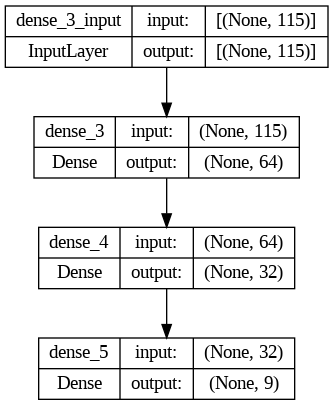

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# Model Evaluation

In [68]:
metric_df = pd.DataFrame(metrics_table)
metric_df.style.highlight_max(axis=0, subset=metric_df.columns[1:])

,Model,Accuracy,Precision,Recall,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.997621,0.997659,0.997621,0.997623,0.997191,0.997196
1,Random Forest Classifier,0.997621,0.997636,0.997621,0.997620,0.997191,0.997193
2,Support Vector Machine,0.971451,0.975077,0.971451,0.971806,0.966281,0.966894
3,K Neighbor Classifier,0.966693,0.969628,0.966693,0.967026,0.960665,0.961146
4,Simple Neural Network,0.961935,0.968660,0.961935,0.962611,0.955040,0.956213


In [ ]:
type(best_gb)

sklearn.ensemble._gb.GradientBoostingClassifier

**Observation:** Gradient Boosting Classifier performs as the best model for predicting the above data

**Reason:**
1. **Highest F1:** A high F1 score indicates that the model has both good precision and good recall, meaning that it is accurately identifying positive instances while minimizing false positives and false negatives. In other words, a high F1 score indicates that a model is effective at correctly identifying instances of a particular class.

2. **Highest AUC**: The higher the AUC score, the better the model's ability to correctly classify the positive and negative samples. 
It calibrates the trade-off between sensitivity and specificity at the best-chosen threshold. 
    Since, we care about true negatives as much as we care about true positives, it totally makes sense to choose high AUC.
3. **Highest MCC**: Since F1-score is asymmetric by not using True negatives at all, we use MCC. 
    A high MCC score indicates that the model has a strong overall performance,It means that the model is able to predict a high percentage of true positives and a high percentage of true negatives,on any balanced or imbalanced dataset. 
4. **Highest Accuracy**: (This is a win-win with other factors)
    With high accuracy, there is a high proportion of samples that are correctly classified.

# Data Visualisation 

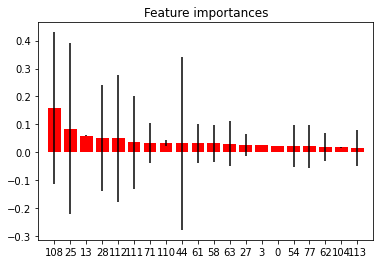

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

n = 20
importances = best_gb.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_gb.estimators_[0]], axis=0)
indices = np.argsort(importances)[::-1][:n]  # Select only top n features

# Visualize feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(n), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(n), indices)
plt.xlim([-1, n])
plt.show()

**Observation:** The graph is showing the feature importances of the variables in our model. Each bar represents the importance of a specific variable, with the height of the bar indicating how much the variable contributes to the accuracy of the model.

The variables are sorted in descending order of importance, so the most important variables are on the left-hand side of the graph. We can see that some variables have very low importances, while others are quite important.

Applying PCA actually reduces the performance based on the experiments. 
While this can be helpful in reducing noise and redundancy in the data, it can also result in the loss of important information that may be necessary for accurate prediction.